## 5. 머신러닝

### 5.2 데이터

실제 데이터인 EUR/USD데이터를 사용한다.

In [64]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
np.random.seed(100)
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [65]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [66]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)['EUR=']

In [67]:
raw.head()

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
Name: EUR=, dtype: float64

In [68]:
l = raw.resample('1M').last()

/tmp/ipykernel_107166/2373559149.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  l = raw.resample('1M').last()


<Axes: title={'center': 'EUR/USD monthly'}, xlabel='Date'>

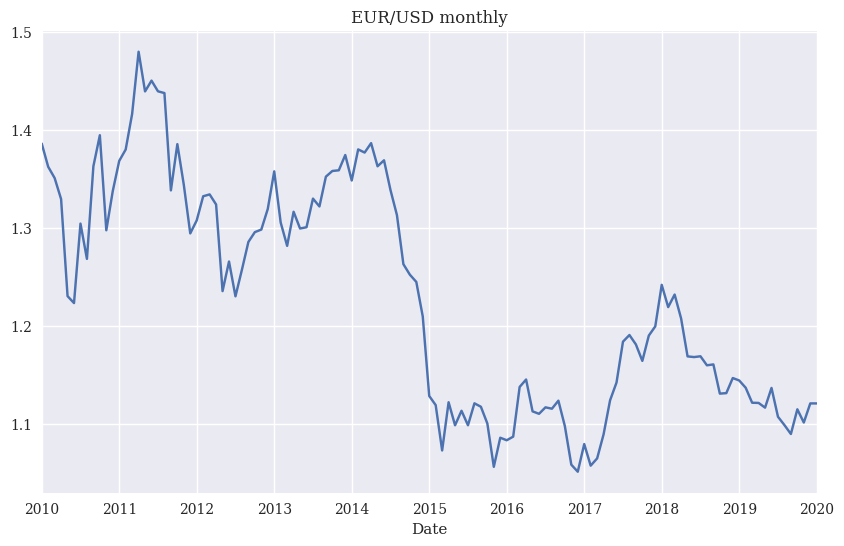

In [69]:
l.plot(figsize=(10,6), title='EUR/USD monthly')

In [70]:
l = l.values # 인덱스 제거 (날짜 제거)

In [71]:
l -= l.mean()

In [72]:
f = np.linspace(-2, 2, len(l))

Text(0, 0.5, 'labels')

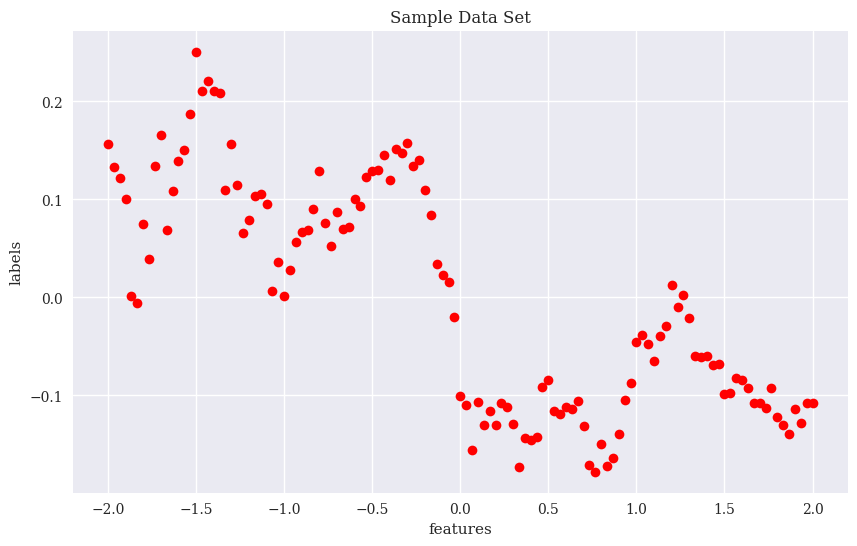

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro')
plt.title('Sample Data Set')
plt.xlabel('features')
plt.ylabel('labels')

f가 x축, l이 y축이다.   
둘이 길이가 같기 때문에 1:1 매칭이 되며 인덱스만 바뀐다.
-2, 2 범위를 쓰는 이유는 가우시안분포처럼 0을 기준으로 하기 위함

### 5.3 성공

데이터의 일부를 평균제곱오차를 통해 성공 여부를 판단한다.

#### 평균오차제곱

In [12]:
def MSE(l, p):
    return np.mean((l - p) ** 2)

In [13]:
reg = np.polyfit(f, l, deg=5)
reg

array([-0.01910626, -0.0147182 ,  0.10990388,  0.06007211, -0.20833598,
       -0.03275423])

In [14]:
p = np.polyval(reg, f)

In [15]:
MSE(l, p)

0.0034166422957371025

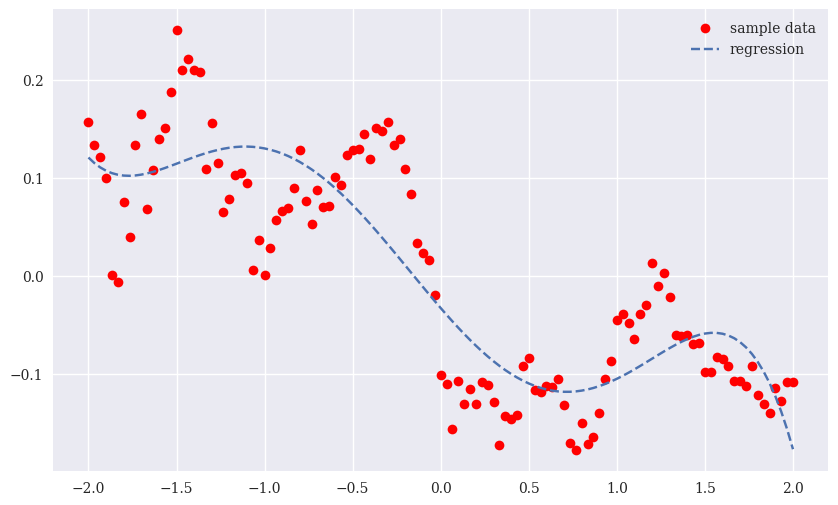

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='regression')
plt.legend()

아래는 회귀분석의 반복학습 시뮬레이션이다.   
원래 회귀분석은 반복학습을 하지 않는다.   
하지만 시뮬레이션은 가능하다.

In [17]:
for i in range(10, len(f) + 1, 20):
    reg = np.polyfit(f[:i], l[:i], deg = 3)
    p = np.polyval(reg, f)
    mse = MSE(l, p)
    print(f'{i:3d} | MSE={mse}')

 10 | MSE=248628.10681642307
 30 | MSE=731.9382249304656
 50 | MSE=12.236088505004465
 70 | MSE=0.7410590619743305
 90 | MSE=0.005743061730409342
110 | MSE=0.006492800939555577


#### 신경망

In [18]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2025-03-09 18:49:23.484010: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-09 18:49:23.499186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-09 18:49:23.503791: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 18:49:23.514411: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1741513764.945981  1071

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4690751743286999271
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1281884160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7482822158793742453
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

d negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741513765.051851  107166 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-09 18:49:25.051968: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /device:GPU:0 with 1222 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [19]:
import tensorflow as tf
tf.random.set_seed(100)

In [20]:
from keras.layers import Dense
from keras.models import Sequential


In [21]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

/config/anaconda3/envs/AI-Finance/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741513765.076978  107166 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741513765.077229  107166 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741513765.077394  107166 cuda_exe

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(f, l, epochs=1500, verbose=False)

CPU times: user 25.5 s, sys: 2.01 s, total: 27.5 s
Wall time: 25.2 s


In [32]:
p = model.predict(f).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [33]:
MSE(l, p)

0.0015119371189171778

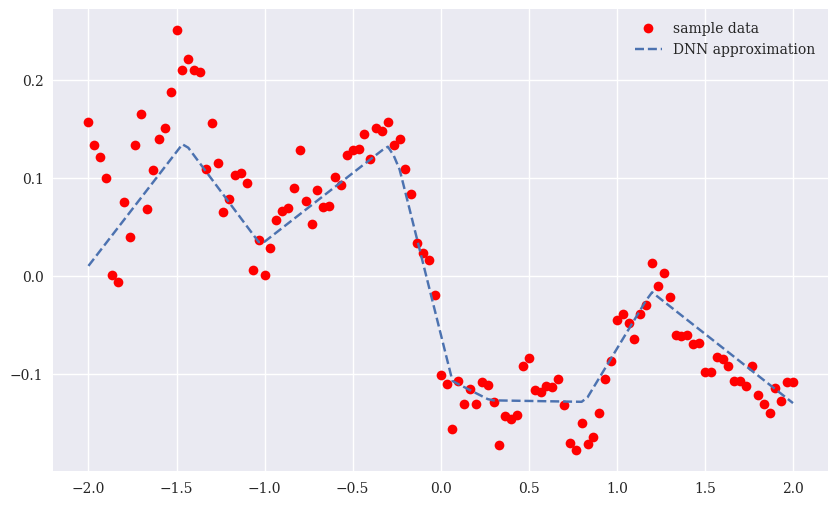

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='DNN approximation')
plt.legend()

keras가 샘플 데이터를 근사화 한 모습이다.   

### 5.4 용량

모형 또는 알고리즘의 용량은 어떤 함수나 관계를 학습할 수 있는지를 정한다.   

#### 선형회귀

파라미터 차수가 높아질수록 회귀분석 모형의 용량이 커진다.

In [40]:
reg = {}
for d in range(1, 12, 2):
    reg[d] = np.polyfit(f, l, deg=d)
    p = np.polyval(reg[d], f)
    mse = MSE(l, p)
    print(f'{d:2d} | MSE={mse}')

 1 | MSE=0.005322474034260403
 3 | MSE=0.004353110724143182
 5 | MSE=0.0034166422957371025
 7 | MSE=0.0027389501772354
 9 | MSE=0.0014119616263308437
11 | MSE=0.001265123786875238


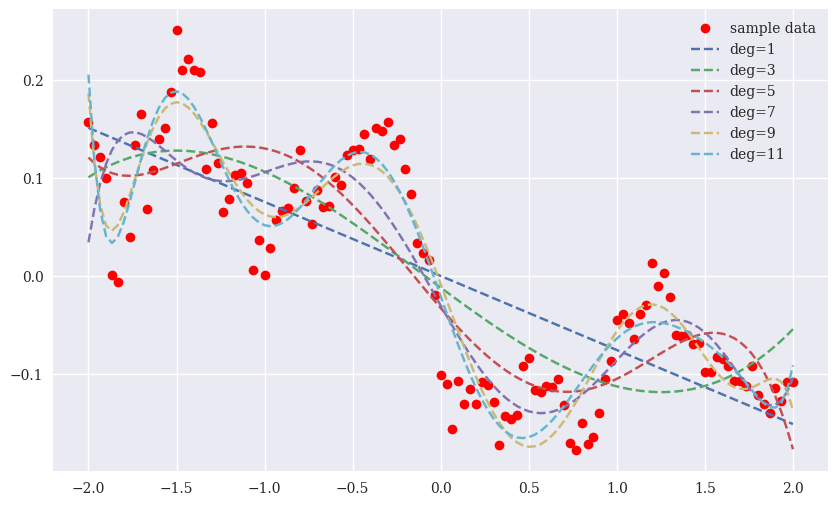

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
for d in reg:
    p = np.polyval(reg[d], f)
    plt.plot(f, p, '--', label=f'deg={d}')
plt.legend()

점점 정확해지는 것을 볼 수 있다.

#### 신경망

신경망의 용량은 여러 가지 하이퍼파라미터에 의존하는 데 그중 두 가지는 다음과 같다.   
 - 은닉층의 개수
  - 각 은닉층에 있는 유닛의 개수

In [23]:
def create_dnn_model(hl=1, hu=256):
    model = Sequential()
    for _ in range(hl):
        model.add(Dense(hu, activation='relu', input_dim=1))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer='rmsprop')
    return model

In [25]:
model = create_dnn_model(3)

In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(f, l, epochs=2500, verbose=False)

I0000 00:00:1741513861.784725  107239 service.cc:146] XLA service 0x7e5c04004e00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741513861.784747  107239 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2025-03-09 18:51:01.810118: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-09 18:51:01.885651: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101
I0000 00:00:1741513862.328756  107239 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [28]:
p = model.predict(f).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [29]:
MSE(l, p)

0.0013194775684052128

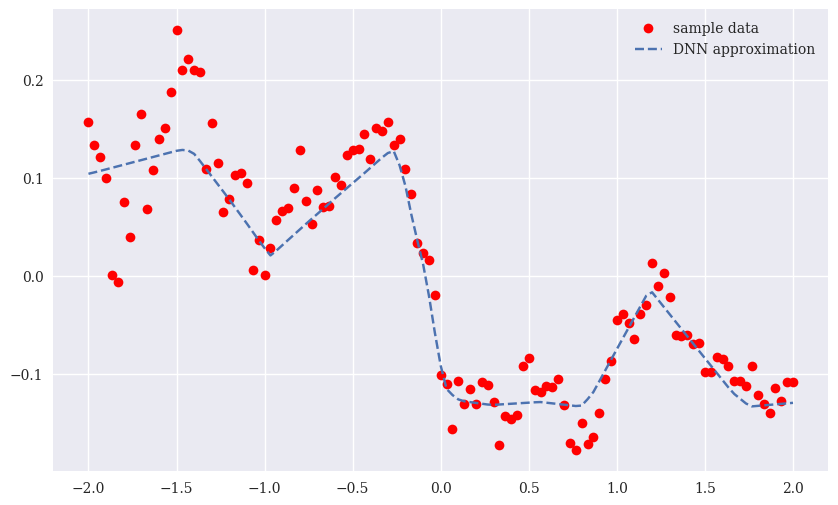

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='DNN approximation')
plt.legend()

### 5.5 성능 측정

In [32]:
te = int(0.25 * len(f))
va = int(0.25 * len(f))

In [34]:
np.random.seed(100)
ind = np.arange(len(f))
np.random.shuffle(ind)

In [37]:
ind_te = np.sort(ind[:te])
ind_va = np.sort(ind[te:te + va])
ind_tr = np.sort(ind[te + va:])

In [38]:
f_te = f[ind_te]
f_va = f[ind_va]
f_tr = f[ind_tr]

In [39]:
l_te = l[ind_te]
l_va = l[ind_va]
l_tr = l[ind_tr]

In [40]:
reg = {}
mse = {}
for d in range(1,22,4):
    reg[d] = np.polyfit(f_tr, l_tr, deg=d)
    p = np.polyval(reg[d], f_tr)
    mse_tr = MSE(l_tr, p)
    p = np.polyval(reg[d], f_va)
    mse_va = MSE(l_va, p)
    mse[d] = (mse_tr, mse_va)
    print(f'{d:2d} | MSE_tr={mse_tr:7.5f} | MSE_va={mse_va:7.5f}')

 1 | MSE_tr=0.00574 | MSE_va=0.00492
 5 | MSE_tr=0.00375 | MSE_va=0.00273
 9 | MSE_tr=0.00132 | MSE_va=0.00243
13 | MSE_tr=0.00094 | MSE_va=0.00183
17 | MSE_tr=0.00060 | MSE_va=0.00153
21 | MSE_tr=0.00046 | MSE_va=0.00837


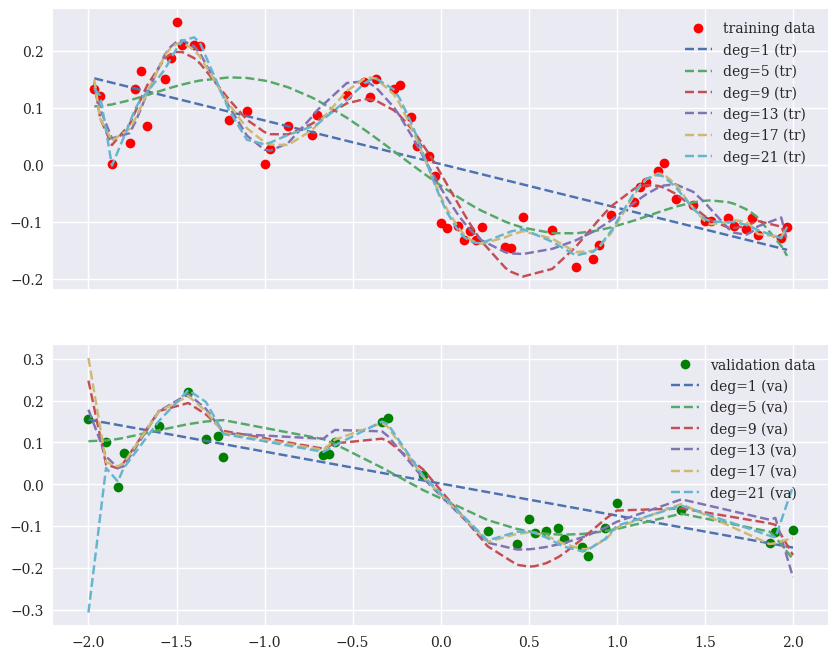

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
ax[0].plot(f_tr, l_tr, 'ro', label='training data')
ax[1].plot(f_va, l_va, 'go', label='validation data')
for d in reg:
    p = np.polyval(reg[d],f_tr)
    ax[0].plot(f_tr, p, '--', label=f'deg={d} (tr)')
    p = np.polyval(reg[d], f_va)
    plt.plot(f_va, p, '--', label=f'deg={d} (va)')
ax[0].legend()
ax[1].legend()

학습에 대한 차수가 올라갈 수록 과최적화 되어서 검증용 데이터에 대해서는 좋은 성능을 보이지 못한다.

In [44]:
from keras.callbacks import EarlyStopping

In [45]:
model = create_dnn_model(2, 256)

/config/anaconda3/envs/AI-Finance/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
callbacks = [EarlyStopping(monitor='loss', patience=100, restore_best_weights=True)]

In [ ]:
model.fit(f_tr, l_tr, epochs=3000, verbose=False, validation_data=(f_va, l_va), callbacks=callbacks)

CPU times: user 4.83 s, sys: 338 ms, total: 5.17 s
Wall time: 4.91 s


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


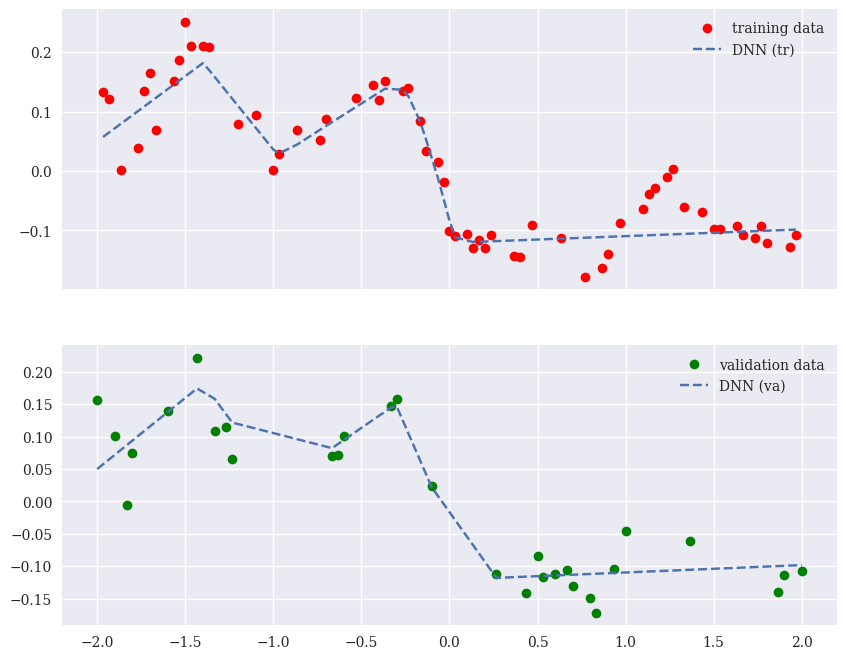

In [53]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax[0].plot(f_tr, l_tr, 'ro', label='training data')
p = model.predict(f_tr)
ax[0].plot(f_tr, p, '--', label=f'DNN (tr)')
ax[0].legend()
ax[1].plot(f_va, l_va, 'go', label='validation data')
p = model.predict(f_va)
ax[1].plot(f_va, p, '--', label=f'DNN (va)')
ax[1].legend()

### 5.6 편향과 분산

머신러닝 알고리즘을 금융에 적용할 때 일반적으로 발생하는 중요 문제는 과적합 문제다.   
테스트 데이터의 성능이 학습 데이터에 대한 성능보다 낮을 때는 과적합이 발생한다.

In [105]:
f_tr = f[:20:2]
l_tr = l[:20:2]

In [106]:
f_va = f[1:20:2]
l_va = l[1:20:2]

In [107]:
reg_b = np.polyfit(f_tr, l_tr, deg= 1)

In [108]:
reg_v = np.polyfit(f_tr, l_tr, deg=9, full=True)[0]

In [109]:
f_ = np.linspace(f_tr.min(), f_va.max(), 75)

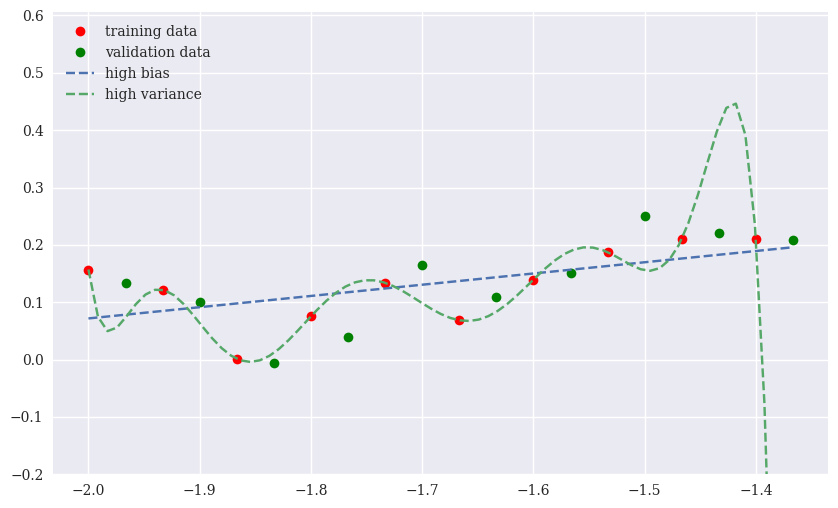

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(f_tr, l_tr, 'ro', label='training data')
plt.plot(f_va, l_va, 'go', label='validation data')
plt.plot(f_, np.polyval(reg_b, f_), '--', label='high bias')
plt.plot(f_, np.polyval(reg_v, f_), '--', label='high variance')
plt.ylim(-0.2)
plt.legend(loc=2)

In [ ]:
## 221 페이지 부터